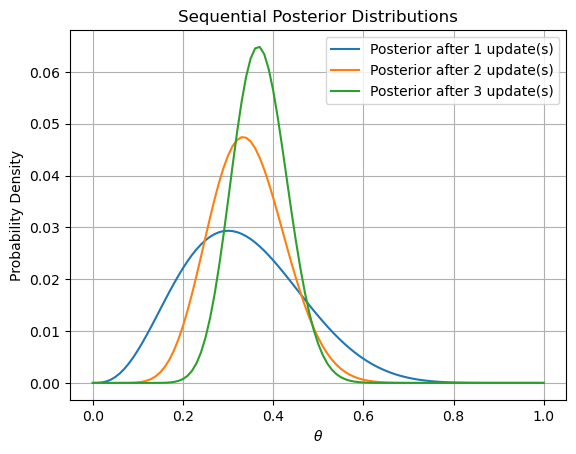

In [2]:
#Q1
import numpy as np
import matplotlib.pyplot as plt

theta_values = np.linspace(0, 1, 101)  
prior = np.ones_like(theta_values) / len(theta_values)  

def likelihood(theta, x, n):
    """Binomial likelihood."""
    return theta**x * (1 - theta)**(n - x)

def posterior_update(prior, x, n):
    """Update the posterior distribution given prior, data x, and n."""
    likelihood_values = likelihood(theta_values, x, n)
    unnormalized_posterior = likelihood_values * prior
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior) 
    return posterior

data = [(3, 10), (7, 20), (12, 30)] 

current_prior = prior
for i, (x, n) in enumerate(data):
    current_posterior = posterior_update(current_prior, x, n)
    plt.plot(theta_values, current_posterior, label=f'Posterior after {i+1} update(s)')
    current_prior = current_posterior

plt.title('Sequential Posterior Distributions')
plt.xlabel(r'$\theta$')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


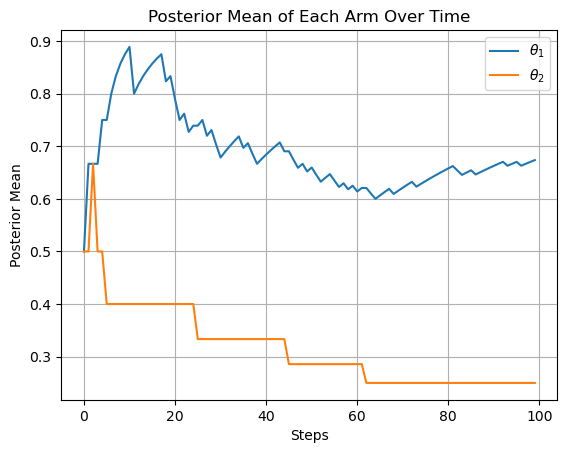

In [3]:
#Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

alpha, beta_param = 1, 1 
theta_true = [0.7, 0.5] 
num_steps = 100  

# 初始化记录
n = [0, 0] 
x = [0, 0] 

posterior_history = []

for t in range(num_steps):

    posteriors = [beta(a=x[j] + alpha, b=n[j] - x[j] + beta_param) for j in range(2)]
    posterior_history.append([posteriors[0].mean(), posteriors[1].mean()])
    samples = [post.rvs() for post in posteriors]
    chosen_arm = np.argmax(samples)

    result = np.random.rand() < theta_true[chosen_arm]
    
    n[chosen_arm] += 1
    x[chosen_arm] += result


posterior_history = np.array(posterior_history)
plt.plot(posterior_history[:, 0], label=r"$\theta_1$")
plt.plot(posterior_history[:, 1], label=r"$\theta_2$")
plt.xlabel("Steps")
plt.ylabel("Posterior Mean")
plt.title("Posterior Mean of Each Arm Over Time")
plt.legend()
plt.grid()
plt.show()


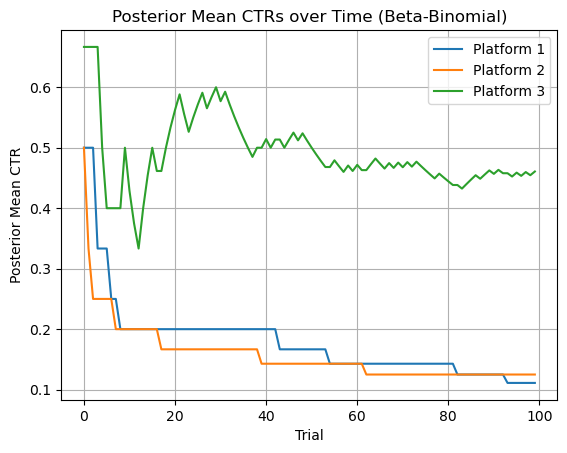

In [4]:
#Q3 Beta-Binomial
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

true_ctr = [0.2, 0.3, 0.5] 
n_platforms = len(true_ctr)  
n_trials = 100


alpha_prior = [1] * n_platforms
beta_prior = [1] * n_platforms
successes = [0] * n_platforms  
trials = [0] * n_platforms    

posterior_means = []
for t in range(n_trials):
    sampled_theta = [beta.rvs(alpha_prior[i], beta_prior[i]) for i in range(n_platforms)]
    chosen_platform = np.argmax(sampled_theta)  

    result = np.random.rand() < true_ctr[chosen_platform] 
    successes[chosen_platform] += result
    trials[chosen_platform] += 1
    alpha_prior[chosen_platform] += result
    beta_prior[chosen_platform] += 1 - result
    posterior_means.append([alpha_prior[i] / (alpha_prior[i] + beta_prior[i]) for i in range(n_platforms)])

posterior_means = np.array(posterior_means)
for i in range(n_platforms):
    plt.plot(posterior_means[:, i], label=f'Platform {i+1}')
plt.xlabel('Trial')
plt.ylabel('Posterior Mean CTR')
plt.title('Posterior Mean CTRs over Time (Beta-Binomial)')
plt.legend()
plt.grid()
plt.show()


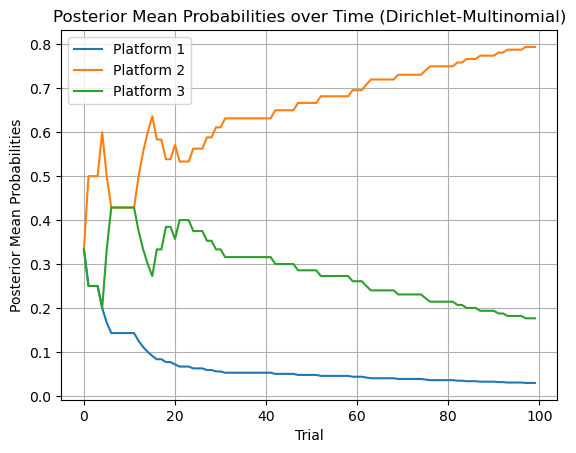

In [5]:
#Q3 Dirichlet-Multinomial

from scipy.stats import dirichlet, multinomial

true_probs = [0.2, 0.3, 0.5]
true_probs /= np.sum(true_probs)

alpha_prior = np.array([1.0, 1.0, 1.0])
n_trials = 100  
success_counts = np.zeros_like(true_probs)

posterior_history = []
for t in range(n_trials):
    sampled_probs = dirichlet.rvs(alpha_prior, size=1).flatten()
    chosen_platform = np.argmax(sampled_probs)
    

    result = np.random.rand() < true_probs[chosen_platform]
    success_counts[chosen_platform] += result
    alpha_prior[chosen_platform] += result 
    posterior_history.append(alpha_prior / np.sum(alpha_prior))
posterior_history = np.array(posterior_history)
for i in range(n_platforms):
    plt.plot(posterior_history[:, i], label=f'Platform {i+1}')
plt.xlabel('Trial')
plt.ylabel('Posterior Mean Probabilities')
plt.title('Posterior Mean Probabilities over Time (Dirichlet-Multinomial)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Discuss: The most suitable method to use can be determined by the entities' relationships. Because it updates posteriors separately for each entity, in the independent case, the Beta-Binomial model is quite effective and simple. If the entities relate or share constraints, this automatically places it within a Dirichlet-Multinomial model so that dependencies can also be modeled where information is shared. For example, under A/B testing and advertising platforms such as Facebook, Google, or LinkedIn that utilize Beta-Binomial, this is optimal when targeting totally different audiences. 